Fraud detection pipeline executed: anomaly detection, feature engineering, model training, evaluation, and simulation completed. Outputs saved.


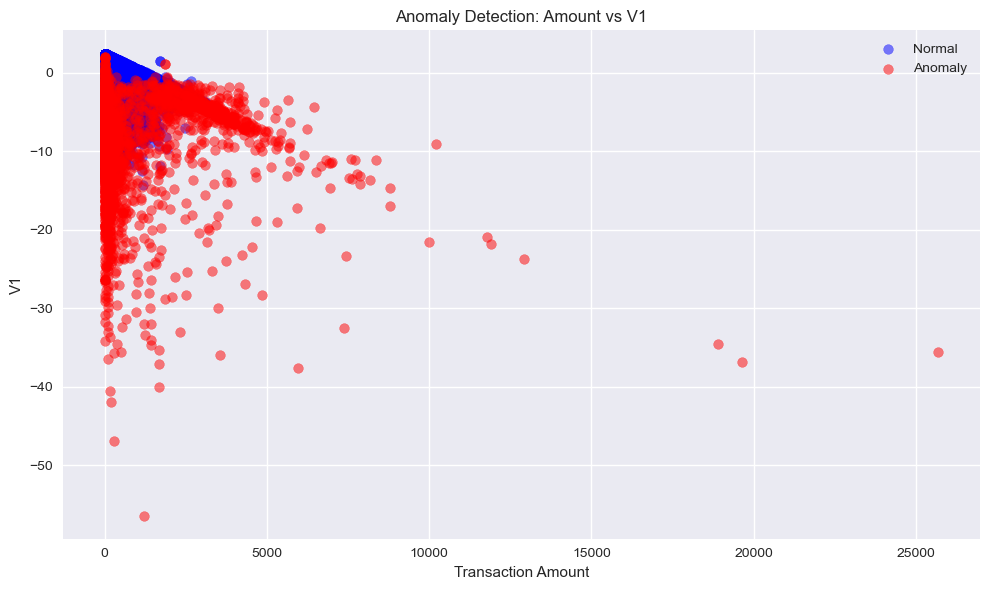

In [12]:
# Creating fraud detection pipeline with anomaly detection, feature engineering, ML models, and simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Creditcard.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Feature Engineering: Normalize 'Amount' and 'Time'
scaler = StandardScaler()
df['norm_amount'] = scaler.fit_transform(df[['Amount']])
df['norm_time'] = scaler.fit_transform(df[['Time']])

# Retain PCA features and normalized features
features = [f'V{i}' for i in range(1, 29)] + ['norm_amount', 'norm_time']
X = df[features]
y = df['Class']

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 for anomaly

# Visualization: Amount vs V1 with anomalies
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.scatter(df[df['anomaly'] == 0]['Amount'], df[df['anomaly'] == 0]['V1'], c='blue', label='Normal', alpha=0.5)
plt.scatter(df[df['anomaly'] == 1]['Amount'], df[df['anomaly'] == 1]['V1'], c='red', label='Anomaly', alpha=0.5)
plt.xlabel('Transaction Amount')
plt.ylabel('V1')
plt.title('Anomaly Detection: Amount vs V1')
plt.legend()
plt.tight_layout()
plt.savefig("/mnt/data/anomaly_scatter.png")

# Machine Learning Models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluation
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt)]
}
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv("/mnt/data/model_metrics.csv", index=False)

# Real-time Monitoring Simulation: Apply models to last 100 transactions
recent_batch = df.tail(100)[features]
recent_preds_lr = lr_model.predict(recent_batch)
recent_preds_dt = dt_model.predict(recent_batch)
simulation_df = pd.DataFrame({
    'Transaction_ID': df.tail(100).index,
    'Logistic_Prediction': recent_preds_lr,
    'DecisionTree_Prediction': recent_preds_dt
})
simulation_df.to_csv("/mnt/data/realtime_simulation.csv", index=False)

print("Fraud detection pipeline executed: anomaly detection, feature engineering, model training, evaluation, and simulation completed. Outputs saved.")